In [131]:
import os
import math 
import numpy as np
import pandas as pd

# Since matplotlib.pyplot is tedious to write,
# access functions using shortcut notation plt instead
import matplotlib.pyplot as plt   

**Get Data** Now we will retreive our data file from the local directory on our computer. The data represents the time taken for the cylinder to roll down the ramp at the given distance.

In [132]:
def data_generator(mean, std, n_measurements = 500, n_samples = 20):
    """
    Generate an array of measurements from a normal distribution.
    
    Parameters
    ----------
    mean : float
        Desired mean value of the measurements.
    std : float
        Desired standard deviation of the measurements.
    n_measurements : int, optional
        Number of separate measurements. Default is 500 measurements.
    n_samples : int, optional
        Number of samples taken per measurement. Default is 20 samples. 
        per measurement.
    
    Returns
    -------
    data : numpy.ndarray
        Array representing the experimental data. Each measurement 
        (composed of many samples) is a row of this array:
                 -----------------------------------
        meas1    | sample0 | sample1 | sample2 | ...
        meas2    | sample0 | sample1 | sample2 | ...
        meas3    | sample0 | sample1 | sample2 | ...
         ...
    """
    return numpy.random.normal(loc = mean, scale = std, 
                               size = (n_measurements, n_samples))

In [133]:
os.chdir(os.getcwd())
data = pd.read_csv("rolldata.csv", header=None, names=['10cm', '20cm', '30cm', '40cm', '47.825cm'])
data

,10cm,20cm,30cm,40cm,47.825cm
0,1.231,1.972,2.522,2.673,3.323
1,1.298,1.945,2.503,2.719,3.299
2,1.305,1.970,2.545,2.769,3.310
3,1.289,1.836,2.550,2.907,3.313
4,1.273,2.023,2.557,2.968,3.302
5,1.474,2.013,2.764,2.990,3.302
6,1.251,1.946,2.539,2.895,3.304
7,1.431,1.943,2.514,2.896,3.310
8,1.293,1.956,2.509,2.950,3.311
9,1.157,2.019,2.509,2.912,3.298


We have used a **pandas** table in order to show the time measurements for each respective distance.
Now we will find the mean and standard deviations for our time trials.

In [134]:
# the mean
meandata = np.mean(data)
meandata

10cm        1.29925
20cm        1.97090
30cm        2.52280
40cm        2.92145
47.825cm    3.29765
dtype: float64

In [135]:
# the standard deviation
stddata = np.std(data, ddof=1)
stddata

10cm        0.068486
20cm        0.056384
30cm        0.063871
40cm        0.120335
47.825cm    0.013554
dtype: float64

**Discussion** Does the mean and standard deviation of our data coincide with our originally calculated results? Yes. Although, if one were to use the **np.std()** method without declaring the degrees of freedom **ddof** then the standard deviation data would have been underestimated. If the latter was the case, then the data calculated with python would not have matched our earlier calculations.

**Data Generator** We will now use the the **data_generator()** method to produce simulated rolling data. After generating the simulated data, we import the data in a pandas **DataFrame** for easier viewing. 

In [136]:
simdata = data_generator(meandata[1], stddata[1])
simdataTable = pd.DataFrame(simdata)
simdataTable

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1.889366,1.987916,1.989867,1.988426,1.956941,1.981927,1.997250,1.912466,1.896017,1.921191,1.887971,1.947854,1.982634,2.014693,1.932953,2.057230,1.994916,1.950722,1.961206,2.008788
1,2.031244,1.941395,1.943363,1.872183,1.918595,1.855373,1.938068,1.961229,1.953414,2.034918,2.093143,2.017772,2.005554,1.960097,1.970573,2.026382,1.987694,2.024313,1.969713,1.948478
2,1.972555,1.893204,2.065999,2.029779,1.959508,1.868699,1.951843,1.952178,1.941959,1.930745,1.979304,1.931371,1.988653,1.981520,1.993851,2.004101,1.974193,2.051487,1.943029,2.004429
3,1.958530,1.932592,1.984110,1.975926,1.949636,1.972879,1.974386,2.023211,2.049366,1.950393,1.952829,1.853589,2.011384,2.019477,1.979551,2.056138,1.904982,2.025344,2.007070,2.076940
4,1.952420,1.932716,1.976232,2.026550,2.014256,1.934614,1.996181,1.956774,1.958801,2.020369,2.039879,1.970970,1.975679,1.919381,1.993436,2.010591,1.995108,1.996406,2.019700,1.947875
5,2.024781,1.917004,1.942135,2.052249,1.917457,1.992158,1.890988,1.958791,1.973853,1.863036,1.890614,1.930446,1.972023,2.073575,1.971045,2.038414,2.005685,2.050143,1.898862,2.036390
6,1.931933,1.883400,1.989195,1.860961,1.972477,1.954335,1.960363,1.949923,2.008627,2.009467,1.874883,1.986984,1.962578,1.937748,1.950616,1.987162,2.020657,2.005197,1.883032,1.903389
7,1.985314,2.064664,1.993926,2.007795,2.066919,1.962301,1.875327,2.012275,2.074189,1.918483,1.982915,1.976640,1.903000,1.979648,2.003407,1.973929,1.999072,2.037556,2.004318,2.041914
8,1.998265,1.983718,2.059174,2.023836,1.950037,1.971641,1.916460,1.936644,1.947376,1.931243,1.993916,1.930347,1.946383,2.007235,1.926691,2.005111,1.933369,2.030863,1.961676,1.884261
9,1.929215,2.029977,1.950249,1.897618,1.988850,1.869697,1.860743,2.114802,1.849913,1.983216,2.027029,1.875713,1.996113,2.037299,1.952594,1.969250,1.945447,1.903880,1.959955,2.000472


# Analysis #

## 1. **Histogram** ##
In order to plot the histogram of the generated data we first flatten the **simdata** by calling the **.flatten()** method on our **simdata** array object.

In [137]:
flatsimdata = simdata.flatten()
flatsimdata

array([ 1.88936613,  1.98791557,  1.98986719, ...,  1.99335072,
        1.9275241 ,  1.9211343 ])

We then create the histogram of **flatsimdata** using the **matplotlib.pyplot.hist()** method. We set the bin width to 50.

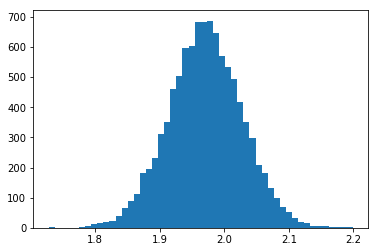

In [138]:
simdataplot = plt.hist(flatsimdata, 50, histtype='bar')
plt.show(simdataplot)

In [139]:
fltdata_mean = np.mean(flatsimdata)
fltdata_std = np.std(flatsimdata, ddof=1)

# saving the histogram data to an external file
#np.savetxt("histogramdata.txt", )
print("Mean: ", fltdata_mean)
print("Standard Deviation: ", fltdata_std)

Mean:  1.97052721147
Standard Deviation:  0.0568418947689


## 2. Histogram of Means ##
Now we

In [140]:
simdata_means = np.mean(simdata, axis=1)
simdata_means

array([ 1.96301666,  1.97267501,  1.97092039,  1.98291669,  1.9818968 ,
        1.96998237,  1.95164628,  1.99317971,  1.96691224,  1.9571017 ,
        1.96069016,  1.9775639 ,  1.99292579,  1.98731013,  1.94744328,
        1.94790886,  1.96030727,  1.98592483,  2.0058378 ,  1.95767284,
        1.95704789,  1.9757461 ,  1.98423533,  1.96013946,  1.97068466,
        1.95501744,  1.96758438,  1.98390207,  1.97963426,  1.98582054,
        1.99084338,  1.97563744,  1.9773392 ,  1.96767119,  1.96863631,
        1.97168434,  1.99480004,  1.96825741,  1.98241222,  1.9771133 ,
        1.96797121,  1.9996537 ,  1.98066294,  1.96701687,  1.98385528,
        1.97125852,  1.95876746,  1.96986714,  1.95931833,  1.9597219 ,
        1.96213385,  1.97990754,  1.98398063,  1.97523167,  1.96950333,
        1.97971416,  1.96490593,  1.96733674,  1.9816325 ,  1.9684059 ,
        1.97419079,  1.97782747,  1.98043724,  1.98928573,  1.96531775,
        1.9930052 ,  1.98793165,  1.97930547,  1.96140564,  1.97

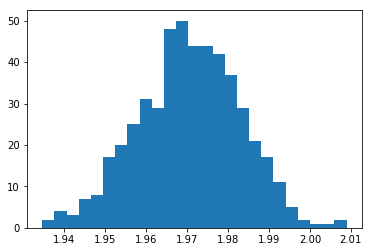

In [141]:
simdata_means_plot = plt.hist(simdata_means, 25, histtype='bar')
plt.show(simdata_means_plot)

In [142]:
simmeansplot_mean = np.mean(simdata_means)
simmeansplot_std = np.std(simdata_means, ddof=1)
# show values and export to .txt file later

## 3. Gaussian Distribution Overlay ##

In [129]:
def normalFunction(mu,sigma,x):
    y = 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (x - mu)**2 / (2 * sigma**2) )
    return(y)

[  2.79568874e-02   3.68382102e-02   4.82740610e-02   6.29121833e-02
   8.15382318e-02   1.05097753e-01   1.34719723e-01   1.71741220e-01
   2.17732628e-01   2.74522594e-01   3.44221731e-01   4.29243851e-01
   5.32323319e-01   6.56526877e-01   8.05258166e-01   9.82253026e-01
   1.19156358e+00   1.43752921e+00   1.72473249e+00   2.05793863e+00
   2.44201713e+00   2.88184488e+00   3.38219081e+00   3.94758253e+00
   4.58215675e+00   5.28949578e+00   6.07245377e+00   6.93297716e+00
   7.87192470e+00   8.88889348e+00   9.98205786e+00   1.11480286e+01
   1.23817398e+01   1.36763713e+01   1.50233125e+01   1.64121746e+01
   1.78308550e+01   1.92656566e+01   2.07014646e+01   2.21219772e+01
   2.35099884e+01   2.48477175e+01   2.61171749e+01   2.73005566e+01
   2.83806551e+01   2.93412722e+01   3.01676218e+01   3.08467076e+01
   3.13676635e+01   3.17220417e+01   3.19040417e+01   3.19106673e+01
   3.17418092e+01   3.14002479e+01   3.08915776e+01   3.02240533e+01
   2.94083688e+01   2.84573709e+01

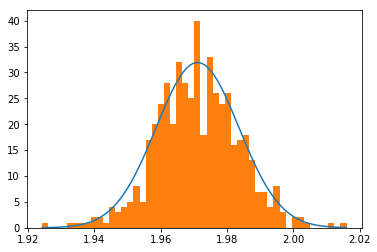

In [130]:
data = simdata_means
x = np.linspace(min(data),max(data),num=100)
y = normalFunction(simmeansplot_mean, simmeansplot_std, x)
print(y)
plt.plot(x,y)
simdata_means_plot = plt.hist(simdata_means, 50, histtype='bar')
plt.show()